In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

In [3]:
fake = pd.read_csv("news/Fake.csv")
true = pd.read_csv("news/True.csv")

In [4]:
fake['label'] = 0
true['label'] = 1

In [5]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
true['title'][21]

'Exclusive: U.S. memo weakens guidelines for protecting immigrant children in court'

In [7]:
true['text'][21]

'NEW YORK (Reuters) - The U.S. Justice Department has issued new guidelines for immigration judges that remove some instructions for how to protect unaccompanied juveniles appearing in their courtrooms. A Dec. 20 memo, issued by the Executive Office for Immigration Review (EOIR) replaces 2007 guidelines, spelling out policies and procedures judges should follow in dealing with children who crossed the border illegally alone and face possible deportation.  The new memo removes suggestions contained in the 2007 memo for how to conduct “child-sensitive questioning” and adds reminders to judges to maintain “impartiality” even though “juvenile cases may present sympathetic allegations.” The new document also changes the word “child” to “unmarried individual under the age of 18” in many instances. (Link to comparison: tmsnrt.rs/2BlT0VK May 2007 document: tmsnrt.rs/2BBR8wj December 2017 document: tmsnrt.rs/2C2sWCs)  An EOIR official said the new memo contained “clarifications and updates” to 

In [8]:
true['label'][21]

1

In [9]:
fake['title'][21]

' KY GOP State Rep. Commits Suicide Over Allegations He Molested A Teen Girl (DETAILS)'

In [10]:
fake['text'][21]

'In this #METOO moment, many powerful men are being toppled. It spans many industries, from entertainment, to journalism, to politics and beyond. Any man that ever dared to abuse his power to sexually harass, molest, or assault women better brace himself for being rooted out, publicly shamed, and forced into early retirement.Well, unfortunately, the latest bombshell story has actually resulted in the suicide of a lawmaker. Kentucky State Representative Dan Johnson left a suicide note on Facebook and then shot himself on a bridge, according to reports from local authorities. Bullitt County Sheriff Donnie Tinnell reported to local station WDRB that Johnson s body was found after his suicide note from Facebook was reported to the local police. Here is that note:Now, nobody wants to celebrate a suicide. This man should have resigned gracefully and faced his accuser, who was a friend of his daughter s, who says that Johnson molested her while she was passed out drunk in his home. Apparently

In [11]:
fake['label'][21]

0

In [8]:
print(true.shape, fake.shape)

(21417, 5) (23481, 5)


In [9]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [10]:
data.shape

(44898, 5)

In [11]:
# We will shuffle the data to prevent bias:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.drop(["date"],axis=1,inplace=True)

In [13]:
data=data.fillna(' ')
data['total']=data['title']+' '+data['text']

In [14]:
data['total'] = data['total'].apply(lambda x: x.lower())

In [15]:
# Remove punctuation:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['total'] = data['total'].apply(punctuation_removal)

In [13]:
# Remove stopwords:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['total'] = data['total'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


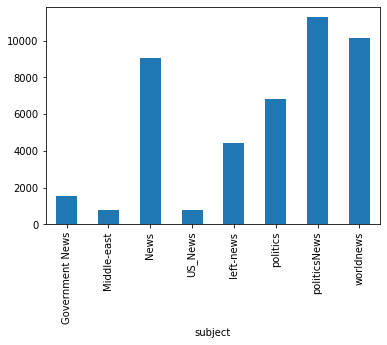

In [14]:
# Data Exploration
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

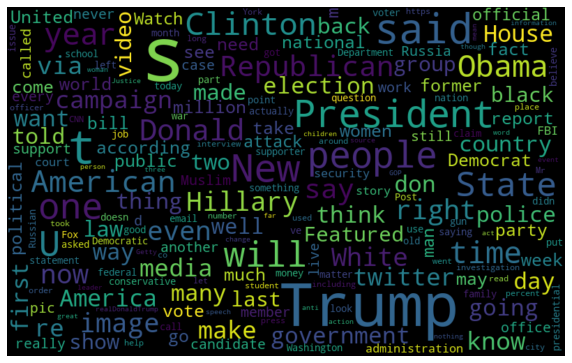

In [15]:
# Word Cloud for fake news:
from wordcloud import WordCloud
fake_data = data[data["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

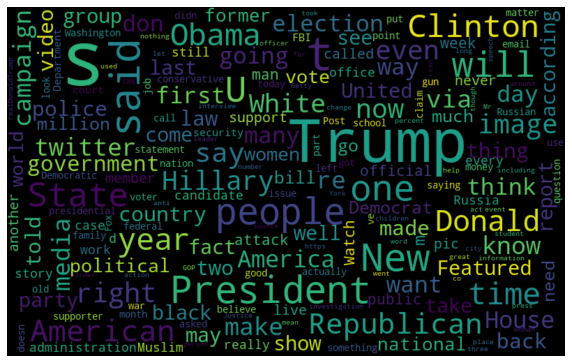

In [16]:
# Word Cloud for real news:
from wordcloud import WordCloud
real_data = data[data["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
 collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
lemmatizer=WordNetLemmatizer()
for index,row in data.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    data.loc[index,'total'] = filter_sentence

In [25]:
data = data[['total','label']]

In [47]:
data.head()

,total,label
0,trump keep politics thanksgiving menu west pa...,1
1,meet woman took evangelical pedophile josh du...,0
2,trump say senate passed healthcare bill brent...,1
3,hillary call cranky socialist stole election ...,0
4,watch party girl malia obama caught camera ro...,0


# Applying NLP Techniques

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
X_train = data['total']
Y_train = data['label']

# Bag-of-words / CountVectorizer

In [67]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [68]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# TF-iDF Vectorizer

In [69]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [70]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [71]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

In [72]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [73]:
tf_idf_matrix

<44898x219148 sparse matrix of type '<class 'numpy.float64'>'
	with 7374554 stored elements in Compressed Sparse Row format>

In [130]:
# Confusion Matrix
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
test = data

In [3]:
# Modelling
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
X_train,X_test,y_train,y_test = train_test_split(data['total'], data.label, test_size=0.2, random_state=42)

NameError: name 'count_vectorizer' is not defined

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.metrics import accuracy_score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

NameError: name 'CountVectorizer' is not defined

Confusion matrix, without normalization


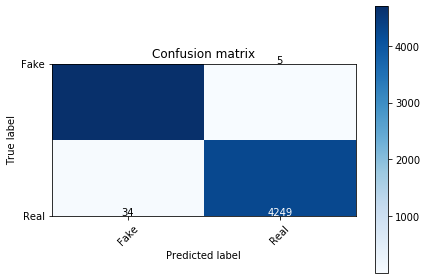

In [131]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [132]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipe, filename)

['pipeline.sav']

In [133]:
filename = './pipeline.sav'

In [138]:
loaded_model = joblib.load(filename)
result = loaded_model.predict([fake['title'][10]])
print(result) 

[0]
